# FRED data

## A.1 Libraries

In [4]:
from fredapi import Fred
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
idx = pd.IndexSlice

## A.2 API Key

In [5]:
api_file = open('api_key.txt')
api_code = "".join(api_file.readlines())
fred = Fred(api_key=api_code)

## A.3 Functions

In [2]:
def calc_yoy(df):
    df = df.pct_change(12).multiply(100).dropna()
    return df

## A.4 Today's date

In [6]:
today = dt.datetime.today().strftime('%Y_%m_%d')
today

'2022_02_14'

# 1. Consumption

## 1.1 Personal Consumption Expenditures: Durable Goods
- Billions of Dollars
- Seasonally Adjusted Annual Rate

In [7]:
df_dur = fred.get_series('PCEDG')
df_dur.head(3)

1959-01-01    42.3
1959-02-01    44.2
1959-03-01    44.4
dtype: float64

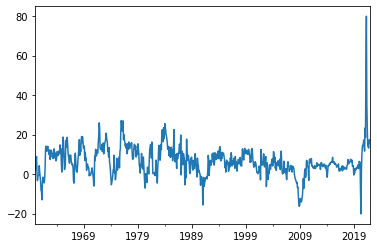

In [8]:
calc_yoy(df_dur).plot();

### 1.1.1 Stimulus checks

In [9]:
#https://www.usa.gov/covid-stimulus-checks
stim_dates = ['2020-04', '2020-12', '2021-03']

In [10]:
stim_dates

['2020-04', '2020-12', '2021-03']

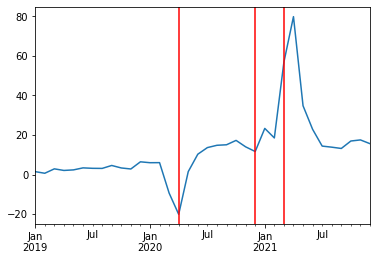

In [11]:
ax = calc_yoy(df_dur)['2019':].plot()
plt.axvline(stim_dates[0], color='red')
plt.axvline(stim_dates[1], color='red')
plt.axvline(stim_dates[2], color='red')

## 1.2 Personal Consumption Expenditures: Nondurable Goods
- Billions of Dollars,
- Seasonally Adjusted Annual Rate

In [12]:
df_ndur = fred.get_series('PCEND')
df_ndur.head(3)

1959-01-01    125.1
1959-02-01    125.4
1959-03-01    127.7
dtype: float64

<AxesSubplot:>

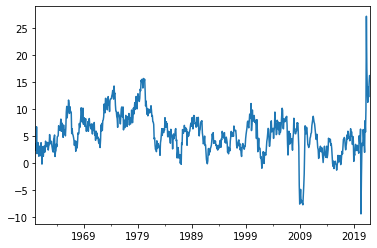

In [13]:
calc_yoy(df_ndur).plot()

## 1.3 Personal Consumption Expenditures: Services

- Billions of Dollars,
- Seasonally Adjusted Annual Rate

In [14]:
df_ser = fred.get_series('PCES')
df_ser.head(3)

1959-01-01    138.7
1959-02-01    140.0
1959-03-01    140.5
dtype: float64

<AxesSubplot:>

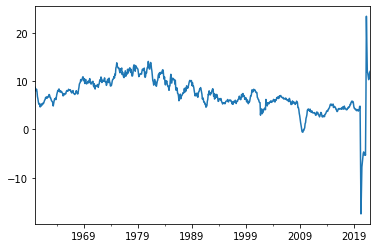

In [15]:
calc_yoy(df_ser).plot()